# Training a dense neural network

The handwritten digit recognition is a classification problem. We will start with the simplest possible approach for image classification - a fully-connected neural network (which is also called a *perceptron*). First, let's start with quickly loading and normalizing the dataset, as we have done in the previous unit:

<br>

---
---
---

<br>

# Entrenamiento de una red neuronal densa

El reconocimiento de dígitos escritos a mano es un problema de clasificación. Comenzaremos con el enfoque más simple posible para la clasificación de imágenes: una red neuronal completamente conectada (que también se llama *perceptrón*). Primero, comencemos cargando y normalizando rápidamente el conjunto de datos, como lo hemos hecho en la unidad anterior:


In [1]:
%pip install tensorflow
%pip install matplotlib
%pip install numpy
%pip install setuptools
%pip install distutils

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# In this tutorial, we will be training a lot of models. In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Pre-fetch the data when running in sandbox environment
# Obtención previa de los datos cuando se ejecuta en un entorno aislado (sandbox)

import os
import requests

# Create the directory if it does not exist
# Crear el directorio si no existe

# directory = os.path.expanduser('~/.keras/datasets')

directory = os.path.dirname(os.path.abspath('3-train-dense-neural-networks.ipynb'))
os.makedirs(directory, exist_ok=True)

# Download the file
# Descargar el archivo

url = 'https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/data/mnist.npz'
response = requests.get(url)
file_path = os.path.join(directory, 'mnist.npz')

with open(file_path, 'wb') as file:
    file.write(response.content)

print(f'Archivo descargado en: {file_path}')

Archivo descargado en: c:\Proyectos_De_Acceso_Rapido\TensorFlow_Fundamentals\Train_Dense_Neural_Networks\mnist.npz


In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data() 
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

## Fully-connected dense neural networks

A basic **neural network** consists of a number of **layers**. The simplest network would include just one fully-connected layer, which is called **Dense** layer, with 784 inputs (one input for each pixel of the input image) and 10 outputs (one output for each class). It is called dense because it contains all possible connections between 784 inputs and 10 outputs, 7840 total connections.

![Dense Neural Network Structure](notebooks/images/dense-one-layer-network.png)

As we discussed above, the dimension of our digit images is $28\times28$. Because the input dimension of a fully-connected layer is 784, we need to insert another layer into the network, called **Flatten**, to change tensor shape from $28\times28$ to $784$.

We want $n$-th output of the network to return the probability of the input digit being equal to $n$. Because the output of a fully-connected layer is not normalized to be between 0 and 1, it cannot be thought of as probability. To turn it into a probability we need to apply another layer called **Softmax**.

The architecture of our network can be represented by the following sequence of layers:

![An image showing the architecture of the network broken into a sequence of layers.](notebooks/images/one-layer-network-layers.png)

It can be defined in Keras in the following way, using `Sequential` syntax:

<br>

---
---
---

<br>

## Redes neuronales densas completamente conectadas

Una **red neuronal** básica consiste en un número de **capas**. La red más simple incluiría solo una capa completamente conectada, que se llama capa **Densa**, con 784 entradas (una entrada para cada píxel de la imagen de entrada) y 10 salidas (una salida para cada clase). Se llama densa porque contiene todas las conexiones posibles entre las 784 entradas y las 10 salidas, un total de 7840 conexiones.

![Estructura de Red Neuronal Densa](notebooks/images/dense-one-layer-network.png)

Como discutimos anteriormente, la dimensión de nuestras imágenes de dígitos es $28\times28$. Dado que la dimensión de entrada de una capa completamente conectada es 784, necesitamos insertar otra capa en la red, llamada **Flatten**, para cambiar la forma del tensor de $28\times28$ a $784$.

Queremos que la $n$-ésima salida de la red devuelva la probabilidad de que el dígito de entrada sea igual a $n$. Dado que la salida de una capa completamente conectada no está normalizada entre 0 y 1, no se puede considerar como una probabilidad. Para convertirla en una probabilidad, necesitamos aplicar otra capa llamada **Softmax**.

La arquitectura de nuestra red se puede representar con la siguiente secuencia de capas:

![Una imagen que muestra la arquitectura de la red desglosada en una secuencia de capas.](notebooks/images/one-layer-network-layers.png)

Se puede definir en Keras de la siguiente manera, utilizando la sintaxis `Sequential`:


In [4]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), 
        keras.layers.Dense(10,activation='softmax')])
model.summary()

c:\Proyectos_De_Acceso_Rapido\TensorFlow_Fundamentals\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Once you have defined a network, you can call the `summary` method to display its architecture and other useful information, such as number of parameters in each layer.

When defining a network, it is important to remember to specify the dimension of the input tensor with the `input_shape` parameter. If you do not do that, Keras is unable to understand how many neurons are required to construct each layer. If `input_shape` is not provided you can still train the network but the summary will be incomplete.

## Anatomy of a Dense Layer

I have mentioned above that a dense layer contains 7840 weighted connections, however, in the `summary` above we see that our dense layer has 7850 parameters. Let's take some time to understand why.

The network input contains 784 pixels, which can be represented by a vector $x$ with 784 numbers. To get an output $z$ of dimension 10 we can multiply it by a matrix $W$ with dimensions $10\times784$: $z=W\times x$.

However, such multiplication defines a linear transformation without shift. Imagine we had only one input value, then the matrix would have just one weight, and the equation $W\times x$ would represent a straight line which goes through the point $(0,0)$. This would not be able to perform arbitrary classifications, because in some cases we also want some **shift** to happen. That means that we need a full equation for a straight line: $z=W\times x + b$, where $b$ is the **bias**.

Similarly, in a dense layer with 784 inputs and 10 outputs, the output would be calculated as $W\times x + b$, where the dimension of **weight** matrix $W$ is $784\times 10$, and the dimension of a **bias** vector $b$ is 10. This gives us $784\times 10 + 10 = 7850$ parameters. 

In Keras, we can get the weight matrix and bias from the `layers` property. Our dense layer is a second layer from the top, thus it can be access using `model.layers[1]`.

<br>

---
---
---

<br>

Una vez que hayas definido una red, puedes llamar al método `summary` para mostrar su arquitectura y otra información útil, como el número de parámetros en cada capa.

Al definir una red, es importante recordar especificar la dimensión del tensor de entrada con el parámetro `input_shape`. Si no lo haces, Keras no podrá entender cuántas neuronas se necesitan para construir cada capa. Si no se proporciona `input_shape`, aún puedes entrenar la red, pero el resumen estará incompleto.

## Anatomía de una Capa Densa

Mencioné anteriormente que una capa densa contiene 7840 conexiones ponderadas, sin embargo, en el `summary` anterior vemos que nuestra capa densa tiene 7850 parámetros. Tomemos un momento para entender por qué.

La entrada de la red contiene 784 píxeles, que se pueden representar mediante un vector $x$ con 784 números. Para obtener una salida $z$ de dimensión 10, podemos multiplicarlo por una matriz $W$ con dimensiones $10\times784$: $z=W\times x$.

Sin embargo, dicha multiplicación define una transformación lineal sin desplazamiento. Imagina que solo tuviéramos un valor de entrada, entonces la matriz tendría solo un peso, y la ecuación $W\times x$ representaría una línea recta que pasa por el punto $(0,0)$. Esto no sería capaz de realizar clasificaciones arbitrarias, porque en algunos casos también queremos que ocurra un **desplazamiento**. Eso significa que necesitamos una ecuación completa para una línea recta: $z=W\times x + b$, donde $b$ es el **sesgo**.

De manera similar, en una capa densa con 784 entradas y 10 salidas, la salida se calcularía como $W\times x + b$, donde la dimensión de la matriz de **pesos** $W$ es $784\times 10$, y la dimensión de un vector de **sesgo** $b$ es 10. Esto nos da $784\times 10 + 10 = 7850$ parámetros.

En Keras, podemos obtener la matriz de pesos y el sesgo desde la propiedad `layers`. Nuestra capa densa es la segunda capa desde la parte superior, por lo que se puede acceder a ella usando `model.layers[1]`.

In [5]:
model.layers[1].weights

[<KerasVariable shape=(784, 10), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential/dense/bias>]

As you can see, `weights` property of a layer returns a list of all weights, in our case it is the actual weight matrix called **kernel**, and a **bias**.

<br>

---
---
---

<br>

Como puedes ver, la propiedad `weights` de una capa devuelve una lista de todos los pesos; en nuestro caso, es la matriz de pesos actual llamada **kernel** y un **sesgo**.

## Training the network

A network defined this way can take any digit as input and produce a vector of probabilities as an output. Let's see how this network performs by giving it a digit from our dataset:

<br>

---
---
---

<br>

## Entrenamiento de la red

Una red definida de esta manera puede tomar cualquier dígito como entrada y producir un vector de probabilidades como salida. Veamos cómo funciona esta red dándole un dígito de nuestro conjunto de datos:

In [6]:
print('Digit to be predicted: ',y_train[0])
model(np.expand_dims(x_train[0],0))

Digit to be predicted:  5


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.06450805, 0.07660246, 0.0367136 , 0.12001358, 0.0515931 ,
        0.10977397, 0.15581541, 0.05161706, 0.09303568, 0.24032716]],
      dtype=float32)>

The output of the network is the **tensor**, represented by the `ft.Tensor` object. The tensor type is very similar to a numpy array, however TensorFlow can operate on tensors very efficiently, shifting computations to GPU for better performance.

> **Note**: In fact, low-level TensorFlow API contains all basic tensor operations, similar to corresponding numpy operations on arrays. For example, you can use `tf.exp` on tensors, and it would be equivalent to calling `np.exp` on numpy arrays.

As you can see the network predicts similar probabilities for each digit. This is because it has not been trained on how to recognize the digits yet. We need to give it our training data to train it on our dataset.

To train the model we first need to **compile** it:

<br>

---
---
---

<br>

La salida de la red es el **tensor**, representado por el objeto `ft.Tensor`. El tipo tensor es muy similar a un array de numpy, sin embargo, TensorFlow puede operar con tensores de manera muy eficiente, trasladando las computaciones a la GPU para un mejor rendimiento.

> **Nota**: De hecho, la API de bajo nivel de TensorFlow contiene todas las operaciones básicas de tensores, similares a las operaciones correspondientes de numpy en arrays. Por ejemplo, puedes usar `tf.exp` en tensores, y sería equivalente a llamar a `np.exp` en arrays de numpy.

Como puedes ver, la red predice probabilidades similares para cada dígito. Esto se debe a que aún no ha sido entrenada para reconocer los dígitos. Necesitamos proporcionarle nuestros datos de entrenamiento para entrenarla en nuestro conjunto de datos.

Para entrenar el modelo, primero necesitamos **compilarlo**:

In [7]:
model.compile(optimizer='sgd',loss='categorical_crossentropy')

When building a model, we specify two important things:
* An **optimizer** that will be used to minimize the error. The simplest optimizer is **stochastic gradient descent**, or SGD; but with more complex networks other optimizers are often used, such as **Adam**
* A **loss function** will be used on the output of the network to obtain the error, which we will then minimize. For this model we will use **categorical cross-entropy** as the loss function.

To train the network, we need to provide an output for each training sample. We have **multi-class classification** problem since the network outputs probabilities for each digit from 0 to 9 (digits). 

We need the expected outputs to have the same layout, i.e. be a 10-number vector that contains 1 in only one position. This is called **one-hot encoding**. For example, digit 5 will be one-hot-encoded by a vector (0 0 0 0 0 1 0 0 0 0).

We can easily one-hot-encode training labels using Keras API:

<br>

---
---
---

<br>

Al construir un modelo, especificamos dos cosas importantes:
* Un **optimizador** que se usará para minimizar el error. El optimizador más simple es el **descenso de gradiente estocástico**, o SGD; pero con redes más complejas a menudo se utilizan otros optimizadores, como **Adam**.
* Una **función de pérdida** que se usará en la salida de la red para obtener el error, que luego minimizaremos. Para este modelo utilizaremos **entropía cruzada categórica** como la función de pérdida.

Para entrenar la red, necesitamos proporcionar una salida para cada muestra de entrenamiento. Tenemos un problema de **clasificación multiclase** ya que la red produce probabilidades para cada dígito del 0 al 9 (dígitos).

Necesitamos que las salidas esperadas tengan el mismo formato, es decir, que sean un vector de 10 números que contenga 1 en solo una posición. Esto se llama **codificación one-hot**. Por ejemplo, el dígito 5 se codificará en one-hot con un vector (0 0 0 0 0 1 0 0 0 0).

Podemos codificar fácilmente en one-hot las etiquetas de entrenamiento utilizando la API de Keras:

In [8]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First 3 training labels:",y_train[:3])
print("One-hot-encoded version:\n",y_train_onehot[:3])

First 3 training labels: [5 0 4]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now, to do the actual training, we call the `fit` function:

<br>

---
---
---

<br>

Ahora, para realizar el entrenamiento propiamente dicho, llamamos a la función `fit`:


In [9]:
model.fit(x_train,y_train_onehot)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - loss: 1.1628


## Monitoring training

This training only loops through the dataset once, which is called one **epoch**. Normally we want training to go on for several epochs, and we can specify the number of epochs we want using a parameter.

Also, it is useful to evaluate the quality of the model on test and/or a validation datasets. It's important to test the model with unseen data because this will help indicate how well the model **generalizes** to other data beyond our dataset. To evaluate the error in between epochs, we can pass in validation data:

<br>

---
---
---

<br>

## Monitoreo del entrenamiento

Este entrenamiento solo recorre el conjunto de datos una vez, lo que se llama una **época**. Normalmente, queremos que el entrenamiento continúe durante varias épocas, y podemos especificar el número de épocas que deseamos utilizando un parámetro.

Además, es útil evaluar la calidad del modelo en los conjuntos de datos de prueba y/o validación. Es importante probar el modelo con datos no vistos porque esto ayudará a indicar qué tan bien el modelo **generaliza** a otros datos más allá de nuestro conjunto de datos. Para evaluar el error entre épocas, podemos pasar datos de validación:

In [10]:
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 0.4773 - val_loss: 0.4002
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - loss: 0.4151 - val_loss: 0.3657
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 0.3788 - val_loss: 0.3477


The `fit` function returns the **history** object that contains the loss data for each training epoch. It can be used to visualize the loss on the graph:

<br>

---
---
---

<br>

La función `fit` devuelve el objeto **history** que contiene los datos de pérdida para cada época de entrenamiento. Se puede usar para visualizar la pérdida en un gráfico:

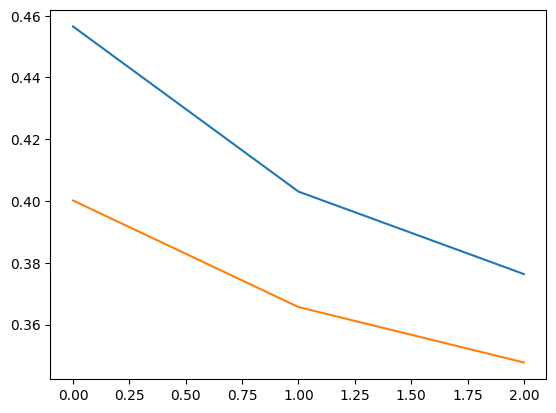

In [11]:
for x in ['loss','val_loss']:
    plt.plot(hist.history[x])

## Metrics and Minibatches

The value of the loss function does not tell us a lot about the accuracy of the model. To measure accuracy, we would want to see the percentage of correctly classified digits from the test dataset. In fact, we can add accuracy as a **metric** during dataset compilation, and it would be displayed and reported all the way through the training:

<br>

---
---
---

<br>

## Métricas y Minilotes

El valor de la función de pérdida no nos dice mucho sobre la precisión del modelo. Para medir la precisión, querríamos ver el porcentaje de dígitos clasificados correctamente en el conjunto de datos de prueba. De hecho, podemos agregar la precisión como una **métrica** durante la compilación del conjunto de datos, y se mostraría e informaría a lo largo de todo el entrenamiento.

In [12]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3,batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9001 - loss: 0.3631 - val_acc: 0.9066 - val_loss: 0.3433
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - acc: 0.9030 - loss: 0.3558 - val_acc: 0.9072 - val_loss: 0.3398
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - acc: 0.9008 - loss: 0.3594 - val_acc: 0.9084 - val_loss: 0.3370


In addition to using new accuracy metrics, we have specified `batch_size` parameter to define the number of samples that are being processed by the neural network at once. Since GPU computations are easily parallelizable, it is much more efficient to process several samples in one go. Larger minibatch size significantly speeds up learning process, but also makes it a little bit less precise. This is due to the fact that the direction of optimization is selected for the whole minibatch, and not for each individual sample. Thus, choosing minibatch size is quite tricky, and it remains one of the hyperparameters that can be further optimized to achieve better performance. 

## Specifying Optimizer Parameters

In the previous call to `compile`, we have been specifying optimizer, loss and metrics using keyword abbreviations, such as `sgd`. However, sometimes we might want to do some fine-tuning to optimizer parameters, or use custom loss function. In such cases, it is possible to pass objects instead of string abbreviations.

Let's use a variation of stochastic gradient descent, which is called **momentum SGD**. The idea is that the gradients of loss function will be averaged over the last few steps in order to keep the momentum, and make optimization more smooth. To turn our gradient descent into momentum SGD, we need to create `SDG` optimizer object explicitly, provide `momentum` parameter, and pass this object to `compile` method.

<br>

---
---
---

<br>

Además de utilizar nuevas métricas de precisión, hemos especificado el parámetro `batch_size` para definir la cantidad de muestras que están siendo procesadas por la red neuronal a la vez. Dado que los cálculos en GPU son fácilmente paralelizables, es mucho más eficiente procesar varias muestras de una sola vez. Un tamaño de minilote más grande acelera significativamente el proceso de aprendizaje, pero también lo hace un poco menos preciso. Esto se debe al hecho de que la dirección de optimización se selecciona para todo el minilote, y no para cada muestra individual. Por lo tanto, elegir el tamaño del minilote es bastante complicado, y sigue siendo uno de los hiperparámetros que se pueden optimizar para lograr un mejor rendimiento.

## Especificación de Parámetros del Optimizador

En la llamada anterior a `compile`, hemos estado especificando el optimizador, la función de pérdida y las métricas utilizando abreviaturas de palabras clave, como `sgd`. Sin embargo, a veces podemos querer ajustar los parámetros del optimizador o utilizar una función de pérdida personalizada. En tales casos, es posible pasar objetos en lugar de abreviaturas de cadenas.

Vamos a usar una variación del descenso de gradiente estocástico, que se llama **SGD con momento**. La idea es que los gradientes de la función de pérdida se promediarán en los últimos pasos para mantener el impulso y hacer que la optimización sea más fluida. Para convertir nuestro descenso de gradiente en SGD con momento, necesitamos crear explícitamente un objeto optimizador `SGD`, proporcionar el parámetro `momentum`, y pasar este objeto al método `compile`.

In [13]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), 
        keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer=keras.optimizers.SGD(momentum=0.5),loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=5, batch_size=64)  

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - acc: 0.7121 - loss: 1.1421 - val_acc: 0.8803 - val_loss: 0.4822
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - acc: 0.8752 - loss: 0.4819 - val_acc: 0.8946 - val_loss: 0.4007
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - acc: 0.8914 - loss: 0.4064 - val_acc: 0.9005 - val_loss: 0.3676
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - acc: 0.8957 - loss: 0.3791 - val_acc: 0.9064 - val_loss: 0.3488
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - acc: 0.8971 - loss: 0.3673 - val_acc: 0.9094 - val_loss: 0.3355


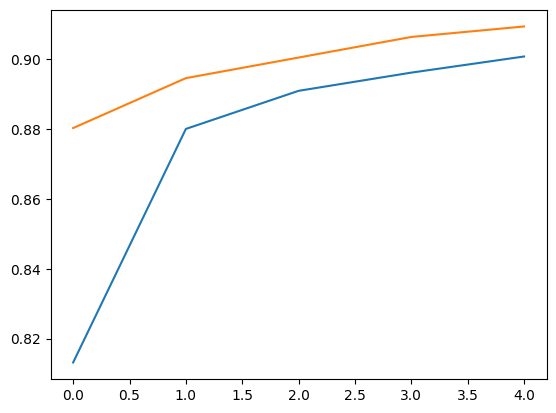

In [14]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

## Visualizing network weights

Now let's visualize the weights of our neural network and see what they look like. When the network is more complex than just one layer, making sense of the weight data is more difficult. However, in this example of classifying a digit in a one-layered perceptron happens by multiplying the initial image by a weight matrix, which allows us to visualize the network weights and see if they make any sense.

Let's create a `weight_tensor` which will have a dimension of 784x10. This tensor can be obtained by calling the `net.parameters()` method. In this example, if we want to see if our number is 0 or not, we will multiply input digit by `weight_tensor[0]` and pass the result through a softmax normalization to get the answer. This results in the weight tensor elements somewhat resembling the average shape of the digit it classifies:

<br>

---
---
---

<br>

## Visualización de los pesos de la red

Ahora, vamos a visualizar los pesos de nuestra red neuronal y ver cómo se ven. Cuando la red es más compleja que solo una capa, interpretar los datos de los pesos es más difícil. Sin embargo, en este ejemplo de clasificación de un dígito en un perceptrón de una capa, se realiza multiplicando la imagen inicial por una matriz de pesos, lo que nos permite visualizar los pesos de la red y ver si tienen algún sentido.

Vamos a crear un `weight_tensor` que tendrá una dimensión de 784x10. Este tensor se puede obtener llamando al método `net.parameters()`. En este ejemplo, si queremos ver si nuestro número es 0 o no, multiplicaremos el dígito de entrada por `weight_tensor[0]` y pasaremos el resultado a través de una normalización softmax para obtener la respuesta. Esto da como resultado que los elementos del tensor de pesos se asemejen un poco a la forma promedio del dígito que clasifica.

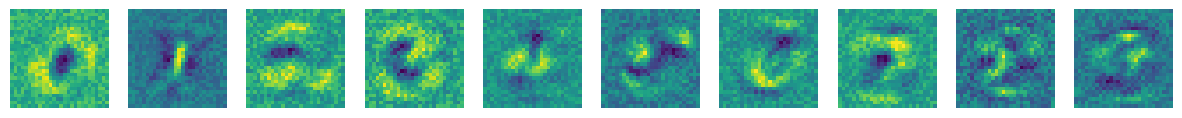

In [15]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

## Takeaway 

Training a neural network in Keras requires just one line of code and tweaking a few parameters. We can see that a single-layer dense neural network shows relatively good performance, but we definitely want to get higher than 91% on accuracy! In the next unit, we will try to use multi-level perceptrons.

<br>

---
---
---

<br>

## Conclusión

Entrenar una red neuronal en Keras requiere solo una línea de código y ajustar algunos parámetros. Podemos ver que una red neuronal densa de una sola capa muestra un rendimiento relativamente bueno, ¡pero definitivamente queremos superar el 91% de precisión! En la próxima unidad, intentaremos utilizar perceptrones multicapa.